# Roots EN exploration
In this notebook I document my exploration of the English part of the Roots dataset. I explore document segmentation and make a case for hierarchical document IDs. I also provide the links for a demo of a BM25 index of all that data.

In [1]:
import os
from huggingface_hub import HfApi
import pandas as pd
from datasets import load_from_disk
import matplotlib.pyplot as plt

In [2]:
pd.set_option("max_colwidth", 400)

In terminal from which `jupyter` is launched, export your huggingface token which gives access to the `bigscience-catalogue-lm-data` orgamization
```
export HUGGINGFACE_TOKEN=hf_XXXXXXXXXXXXXXX
```

In [3]:
HUGGINGFACE_TOKEN = os.environ.get("HUGGINGFACE_TOKEN")

## Listing datasets and explore samples
First we take a look at all datasets I consider in this analysis and explore samples documents from some of the datasets. When looking at samplese, I'm first displaying raw data and then printing - this way we get a better intuition about whitespace formatting of text. Note we're only looking at prefixes of respective docs.

In [12]:
cleaned_lm_en_datasets = [
    ds_info.id
    for ds_info in HfApi().list_datasets(use_auth_token=HUGGINGFACE_TOKEN)
    if ds_info.private and ds_info.id.startswith("bigscience-catalogue-lm-data/cleaned_lm_en_")
]
display(cleaned_lm_en_datasets)
print(len(cleaned_lm_en_datasets))

['bigscience-catalogue-lm-data/cleaned_lm_en_uncorpus',
 'bigscience-catalogue-lm-data/cleaned_lm_en_book_dash_books',
 'bigscience-catalogue-lm-data/cleaned_lm_en_odiencorp',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_159_www_postcrescent_com',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_304_www_semana_com',
 'bigscience-catalogue-lm-data/cleaned_lm_en_multi_un_2',
 'bigscience-catalogue-lm-data/cleaned_lm_en_no_code_stackexchange',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_470_forums_hardwarezone_com_sg',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_339_www_actasanitaria_com',
 'bigscience-catalogue-lm-data/cleaned_lm_en_open_subtitles',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_395_www_evwind_es',
 'bigscience-catalogue-lm-data/cleaned_lm_en_project_gutenberg',
 'bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_485_blog_moneysmart_sg',
 'bigscience-catalog

44


In [13]:
def display_sample_doc(dataset_id):
    dataset = load_from_disk("../data/bigscience-catalogue-lm-data/cleaned_lm_en_" + dataset_id)
    display(dataset["train"][28]["text"][:1000])


def print_sample_doc(dataset_id):
    dataset = load_from_disk("../data/bigscience-catalogue-lm-data/cleaned_lm_en_" + dataset_id)
    print(dataset["train"][28]["text"][:1000])


def inspect_sample_doc(dataset_id):
    display_sample_doc(dataset_id)
    print_sample_doc(dataset_id)

In [14]:
inspect_sample_doc("open_subtitles")

"Mr. Lagana.\nI know it's late.\nWake him up.\nTell him it's Tom Duncan's widow.\nI'm sorry, but there's an important call on the private line.\nA woman who says she's Tom Duncan's widow.\n-Widow?\n-That's what she said.\nYes?\nThis is Lagana.\nI'm glad you called me, Mrs. Duncan.\nI appreciate it.\nYes, of course, we'll get together.\nBut now I suggest you call the police immediately.\nCall Vince.\nMr. Lagana wants Vince Stone.\nIt's his girl.\nShe says he's playing cards.\nThis is not a social call, Debby.\nTell Vince I want him.\nRight away.\nSure, Mr. Lagana.\nI always like to tell Vince you're calling.\nI like to see him jump.\nVince.\nIt's him.\nI'll pass a deal.\nWhy don't you shut the door and see if anybody needs a drink?\nI don't know about your politicians, but I'm so bored I need one.\nTwo.\nDebby!\nShut the door.\nYes, Mike?\nI didn't know it was the private line or I'd have answered it myself.\nWhen?\nWhen did it happen?\nI'll see to it.\nSorry you had to come from headqu

Mr. Lagana.
I know it's late.
Wake him up.
Tell him it's Tom Duncan's widow.
I'm sorry, but there's an important call on the private line.
A woman who says she's Tom Duncan's widow.
-Widow?
-That's what she said.
Yes?
This is Lagana.
I'm glad you called me, Mrs. Duncan.
I appreciate it.
Yes, of course, we'll get together.
But now I suggest you call the police immediately.
Call Vince.
Mr. Lagana wants Vince Stone.
It's his girl.
She says he's playing cards.
This is not a social call, Debby.
Tell Vince I want him.
Right away.
Sure, Mr. Lagana.
I always like to tell Vince you're calling.
I like to see him jump.
Vince.
It's him.
I'll pass a deal.
Why don't you shut the door and see if anybody needs a drink?
I don't know about your politicians, but I'm so bored I need one.
Two.
Debby!
Shut the door.
Yes, Mike?
I didn't know it was the private line or I'd have answered it myself.
When?
When did it happen?
I'll see to it.
Sorry you had to come from headquarters, Sergeant.
From out of bed, you

In [15]:
inspect_sample_doc("project_gutenberg")

'E-text prepared by Lionel G. Sear of Truro, Cornwall, England, and\ndedicated to the memory of R. F. Mudie, who won the book used as the\nsource for this e-text as Form II First Prize for the Summer Term in\n1901 at the Seafield House Preparatory School, Broughty Ferry, Scotland\n\n\n\n\nTHE TRIPLE ALLIANCE\n\nITS TRIALS AND TRIUMPHS\n\nBy HAROLD AVERY\n\n\n\n\n\n\n\nCONTENTS.\n\n\nChapter.\n\n    I.  A NEW BOY,\n\n   II.  THE PHILISTINES,\n\n  III.  DISCOMFITURE OF THE PHILISTINES,\n\n   IV.  THE SUPPER CLUB,\n\n    V.  CATCHING A TARTAR,\n\n   VI.  GUNPOWDER PLOT,\n\n  VII.  RONLEIGH COLLEGE,\n\n VIII.  THIRD FORM ORATORY,\n\n   IX.  A HOLIDAY ADVENTURE,\n\n    X.  A SCREW LOOSE IN THE SIXTH,\n\n   XI.  SHADOWS OF COMING EVENTS,\n\n  XII.  THE WRAXBY MATCH,\n\n XIII.  THE ELECTIONS,\n\n  XIV.  A PASSAGE OF ARMS,\n\n   XV.  THE READING-ROOM RIOT,\n\n  XVI.  THE CIPHER LETTER,\n\n XVII.  DIGGORY READS THE CIPHER,\n\nXVIII.  A SECRET SOCIETY,\n\n  XIX.  A CHAPTER OF ACCIDENTS,\n\n   XX

E-text prepared by Lionel G. Sear of Truro, Cornwall, England, and
dedicated to the memory of R. F. Mudie, who won the book used as the
source for this e-text as Form II First Prize for the Summer Term in
1901 at the Seafield House Preparatory School, Broughty Ferry, Scotland




THE TRIPLE ALLIANCE

ITS TRIALS AND TRIUMPHS

By HAROLD AVERY







CONTENTS.


Chapter.

    I.  A NEW BOY,

   II.  THE PHILISTINES,

  III.  DISCOMFITURE OF THE PHILISTINES,

   IV.  THE SUPPER CLUB,

    V.  CATCHING A TARTAR,

   VI.  GUNPOWDER PLOT,

  VII.  RONLEIGH COLLEGE,

 VIII.  THIRD FORM ORATORY,

   IX.  A HOLIDAY ADVENTURE,

    X.  A SCREW LOOSE IN THE SIXTH,

   XI.  SHADOWS OF COMING EVENTS,

  XII.  THE WRAXBY MATCH,

 XIII.  THE ELECTIONS,

  XIV.  A PASSAGE OF ARMS,

   XV.  THE READING-ROOM RIOT,

  XVI.  THE CIPHER LETTER,

 XVII.  DIGGORY READS THE CIPHER,

XVIII.  A SECRET SOCIETY,

  XIX.  A CHAPTER OF ACCIDENTS,

   XX.  SOWING THE WIND,

  XXI.  REAPING THE WHIRLWIND,

 XXII.  WHE

In [16]:
inspect_sample_doc("oscar")

"In recognition of their achievements, the Hollies were inducted to the Rock and Roll Hall of Fame in 2010.[2] In the same year, a compilation album, Midas Touch: The Very Best of The Hollies, charted in the UK at No. 23.\nIn 2012, the Hollies released Hollies Live Hits! We Got The Tunes!, a live Double CD featuring the Hollies' live performances recorded during the band's 2012 UK Tour.\n2013, the Hollies 50th year, was packed with a worldwide 50th Anniversary Concert Tour performing over 60 concerts."

In recognition of their achievements, the Hollies were inducted to the Rock and Roll Hall of Fame in 2010.[2] In the same year, a compilation album, Midas Touch: The Very Best of The Hollies, charted in the UK at No. 23.
In 2012, the Hollies released Hollies Live Hits! We Got The Tunes!, a live Double CD featuring the Hollies' live performances recorded during the band's 2012 UK Tour.
2013, the Hollies 50th year, was packed with a worldwide 50th Anniversary Concert Tour performing over 60 concerts.


# Exploring document lengths
I use a small slice of the subset of the Enlglish subset of the 10% sample of Roots (the [roots_1e-1](https://huggingface.co/datasets/bigscience-catalogue-lm-data/roots_1e-1) dataset) to analyze the document length (in words) distribution of Roots documents. We apply a simple split-on-whitespace heuristic to tokenize documents into words. As we can see the majority of documents are short, but we have a long tail of very long documents (uo to over 28000 words in the sample we consider).

In [22]:
# dataset = load_dataset("bigscience-catalogue-lm-data/roots_1e-1", use_auth_token=HUGGINGFACE_TOKEN)
# dataset_en = dataset["train"].filter(lambda example: example["language"] == "en")
# dataset_en.save_to_disk("../data/roots_1e-1_en")

In [23]:
dataset_en = load_from_disk("../data/roots_1e-1_en")
dataset_en = dataset_en.shuffle()
dataset_en

Dataset({
    features: ['dataset_id', 'text', 'meta', 'language', 'doc_id'],
    num_rows: 7704685
})

In [24]:
en_slice = pd.DataFrame.from_dict(dataset_en[:100000])
en_slice["doc_len"] = en_slice.apply(lambda x: len(x["text"].split()), axis=1)
en_slice

,dataset_id,text,meta,language,doc_id,doc_len
0,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"Although it might sound a bit too good to be true, it is possible to get a decent no deposit bonus today, simply by creating an account with a casino.",None,en,1383078828718,30
1,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"As penance for that atrocious article, if you let me know what your preferred substitute for ground beef is, I'll be more than happy to post a vegetarian friendly version of my chili recipe... involving beer no less.\nGo ahead and post the chili recipe, por favor. The Morningstar people make a frozen faux crumbled beef which is extremely palatable which I can substitute for meat.\nThe rule of ...",None,en,1383084821245,191
2,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"Lucy served on the San Diego City Council, and also served eight years in the California Assembly and seven years in the state Senate. She has had a little-known but fascinating career in other government service, including U.S. military intelligence and the CIA, and she attended the first United Nations General Assembly in 1946 in London as part of the U.S. delegation led by Eleanor Roosevelt...",None,en,1383104361564,81
3,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"For the second time in less than a week, one of the top teams in the NHL over the past 15 years came into the Coliseum and were overwhelmed, and shutout, by the Islanders. Today it was New Jersey's turn, as the Isles blanked the Devils 4-0. On to the trick:\n1. As he did in the 6-0 shutout win on Tuesday over Detroit, Matt Moulson scored in the game's second minute to give the Isles the lead. ...",None,en,1383109702955,395
4,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"To prevent the wings from getting soggy, toss them prior to serving. Serve with toasted sesame seeds and spring onions",None,en,1383104498835,20
...,...,...,...,...,...,...
99995,bigscience-catalogue-lm-data/cleaned_lm_en_s2orc_ai2_pdf_parses,"THE NEED FOR INDIRECT APPROACHES\nMany areas of basic and applied nuclear physics require cross sections for neutron-capture reactions that proceed through a compound nucleus. Capture reactions occurring in the astrophysical s and r processes produce the majority of the heavy elements beyond iron, and their cross sections are necessary input for models of these processes and of stellar evoluti...","{paper_id=42174174, _pdf_hash=0e9663f042342cfb298931470d8c3c5c57228181}",en,498218132897,4339
99996,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"From our place at Makro-Gialos, we made an excursion to the countryside. A few hundred meters above the beautiful village Pefki , there is Spileo Vriko, a small unattended cave with stalactites. Unfortunately, we figured that we would need much better light to fully explore the cave. With some of the weak light we were…\nYesterday we found an amazing place. It features a nice lonely spot for o...",None,en,1383109904892,179
99997,bigscience-catalogue-lm-data/cleaned_lm_en_oscar,"The boat was also open during the day and featured live performances from – Harmergeddon, Jamka, Tom Richards and Tom Mudd as well as DJ sets from Kirsti, Uberdog and James Tec.\nIt was a very special day and evening filled to capacity with a diverse range of music and art lovers from techno ravers to industrial music fans – all brought together by the incredible space and the one-off nature o...",None,en,1383105220989,74
99998,bigscience-catalogue-lm-data/cleaned_lm_en_wikipedia,"Amory–Ticknor House\n\nThe Amory–Ticknor House is a historic house at 9-10 Park Street and 22-22A Beacon Street in Boston, Massachusetts. It was built in 1804 by businessman Thomas Coffin Amory, and later owned by scholar George Ticknor. It sits atop Beacon Hill, across from the Massachusetts State House on Beacon Street and the Boston Common on Park Street. Numerous tenants have occupied var...",{'wikidata_id': b'Q4747799'},en,438088742361,525


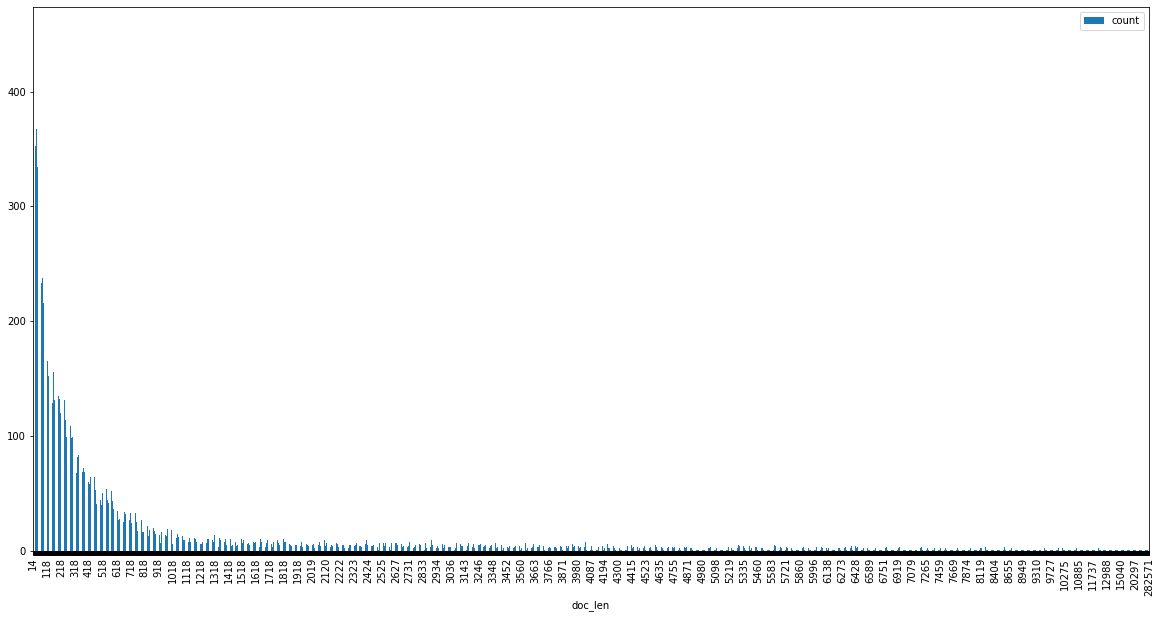

In [28]:
en_slice_lengths = (
    en_slice.groupby("doc_len")["dataset_id"]
    .count()
    .reset_index(name="count")
    .sort_values("doc_len", ascending=True)
)

xticklabels = [
    str(en_slice_lengths.iloc[i]["doc_len"]) if i % 100 == 0 else " "
    for i in range(len(en_slice_lengths["doc_len"]))
]

ax = en_slice_lengths.plot(
    x="doc_len",
    y="count",
    figsize=(20, 10),
    kind="bar",
)
ax.set_xticklabels(xticklabels)

plt.savefig("doc_len_plot.pdf")

## Data segmentations
As seen in samples from datasets, we don't have a consistent markup for naturally occuring paragraphs. At the same time documents vary in length vastly, with some very long documents at the tail. For that reason **I propose to split documents into paragraphs of equal length - e.g. 256 words each.** Below I present results of the analysis of full english datasets (see list at the beginning of the notebook) - pre-computed and loaded from csv for speed. I look at:
- `num_doc` - the total number of documents in a dataset
- `avg_doc_len` - average length of the document IN CHARACTERS (the result of python's `len()` appled to the full doc)
- `avg_doc_word_count` - average number of words per document, where words are naively achieved by splitting on whitespace
- `total_paragraphs` - total number of paragraphs if we assume 256-word, non-overlapping paragraphs.

I also look at the fields available in those datasets, and if metadata are available - the metadata fields.

In [29]:
df = pd.read_csv("../data/datasets_summary.csv", index_col=0)
df

,dataset,split,num_doc,fields,metadata_fields,avg_doc_len,avg_doc_word_count,total_paragraphs
0,bigscience-catalogue-lm-data/cleaned_lm_en_uncorpus,train,143703,"['text', 'meta']",['file'],31398,4630,2526905
1,bigscience-catalogue-lm-data/cleaned_lm_en_book_dash_books,train,29,"['text', 'meta']",['path'],2462,419,33
2,bigscience-catalogue-lm-data/cleaned_lm_en_odiencorp,train,2,['text'],[],3026,450,2
3,bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_159_www_postcrescent_com,train,41820,"['meta', 'text']","['content_languages', 'seed_id', 'url']",3700,601,76952
4,bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_304_www_semana_com,train,40749,"['meta', 'text']","['content_languages', 'seed_id', 'url']",4750,770,101897
5,bigscience-catalogue-lm-data/cleaned_lm_en_multi_un_2,train,88014,"['text', 'meta']",['file_path'],28910,4178,1392217
6,bigscience-catalogue-lm-data/cleaned_lm_en_no_code_stackexchange,train,1815195,"['meta', 'text']",['file'],2686,413,1970346
7,bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_470_forums_hardwarezone_com_sg,train,16826,"['meta', 'text']","['content_languages', 'seed_id', 'url']",3060,508,24887
8,bigscience-catalogue-lm-data/cleaned_lm_en_pseudocrawl-filtered_339_www_actasanitaria_com,train,9361,"['meta', 'text']","['content_languages', 'seed_id', 'url']",3511,543,15043
9,bigscience-catalogue-lm-data/cleaned_lm_en_open_subtitles,train,372795,"['text', 'meta']",['file'],29257,4550,6441342


In [30]:
df["total_paragraphs"].sum()

268241220

## Document IDs

In a conversation in a meeting 2 weeks ago we considered various approaches to assigning unique document IDs, with two main proposals being:
- hashes based on the document content
- using identifiers existing in underlying datasets, e.g. URLs
- symbolic, possibly hierarchical, document IDs.

We need document IDs in order to be able to refer to unique documents in various contexts, e.g. if we want to compare multiple vector representations of a document. Another common scenario could be the following: we retrieve a document from a pre-built index, but post-retroieval, we want to access additional metadata for this document - these could be sotred in a separate key-value store, and we would need a unique ID to be able to access them easily.

Below I list desirable properties of the unique document IDs:
- we should be able to assign new document IDs if we add datasets and documents withing existing datasets
- they should be invariant to additions / removals of documents within datasets
- they should be invariant to modifications withing the content of documents (e.g. removing of PII (personally identifiable information)

For that reason I'm a fan of the hierarchical approach to document IDs - in my experiments I play with the following format:
```
dataset_id|datapoint_id|paragraph_id
```
e.g. `oscar|6630344|para_256_16_9` - this means that a document comes from `oscar` it's id in the dataset is 6630344 and the paragraph ID withing the document is `para_256_16_9`. This way we could refer to the full document with just `dataset_id|datapoint_id` but then we could use the paragraph-specific suffix to implement various segmentation strategies.

## Index demo
Based on the analysis above, I create the following search demo:

https://huggingface.co/spaces/bigscience-catalogue-lm-data/scisearch

I make the following design choices in the demo.

### Preprocessing
I normalize the text by removing redundant whitespaces, lower-casing everything and removing punctuation. See [link](https://huggingface.co/spaces/bigscience-catalogue-lm-data/scisearch/blob/main/app.py#L11-L33) for details.

### Paragraphs
As discussed above, I opt for even-lenth paragraphs of 256 words. Given that chopping text up randomly may remove important context, I use 16-word overlap window between paragraphs, so e.g. if the pirst paragraph will be `words[0:256]`, then the second would be `words[240:496]`. For that reason my index has more paragraphs then it would seem looking at `datasets_summary.csv` above. Additionally, for documents with more than a single paragraph, instead of padding the last paragraph, I just use the last 256 words of the document. In some corner cases it means that a document will produce 2 very similar paragraphs, if e.g. it's 256 words long.

#### Special treatement of titles

### Documents IDs
As describe above I go for a hierarchichal doc ids as follows:

```
dataset_id|datapoint_id|paragraph_id
```
e.g. `oscar|6630344|para_256_16_9` - means the 6630344th sample from the oscar dataset, `para_256_16_9` is my convension to say - I use 256-word paragraphs with 16 word overlap, and this is the 9th paragraph in the document using such strategy. One ammendmet which may be necessary is to add a language identifier, so e.g. we'd end up with  `en|oscar|6630344|para_256_16_9` in this case.